# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  



import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#In [2]: import pandas
from statsmodels.stats.outliers_influence import variance_inflation_factor

#In [3]: from patsy import dmatrices

#import statsmodels.robust

%matplotlib inline

## Gather Data
[Source: Original research paper](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

In [2]:
boston_dataset = load_boston()

C:\Users\20109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [6]:
type(boston_dataset.data)

numpy.ndarray

In [7]:
boston_dataset.data.shape

(506, 13)

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data exploration with pandas Dataframe

In [10]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

data['PRICE'] = boston_dataset.target

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [13]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [14]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visiualising Data - Histograms, Distributions, and Bar charts

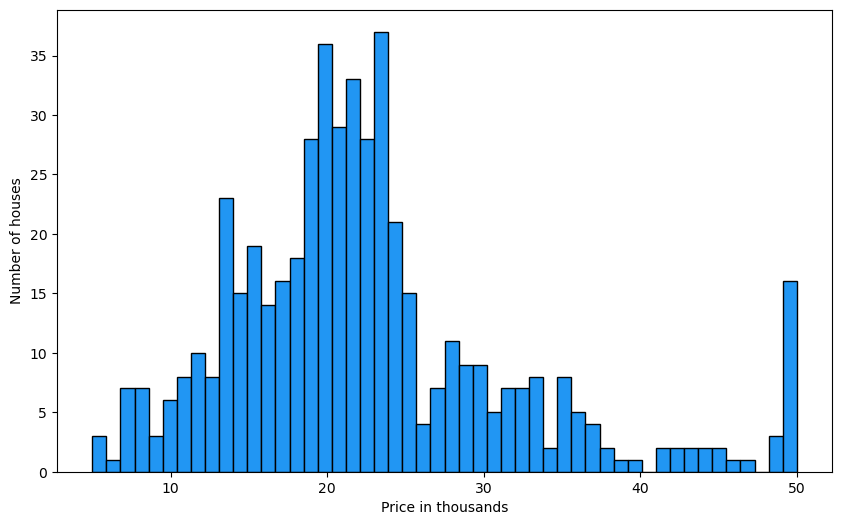

In [16]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins= 50, ec = 'black', color = '#2196f3')
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses')
plt.show()

C:\Users\20109\AppData\Local\Temp\ipykernel_11520\799801443.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PRICE'], bins=50, hist = True, kde = False, color = '#fbc02d')


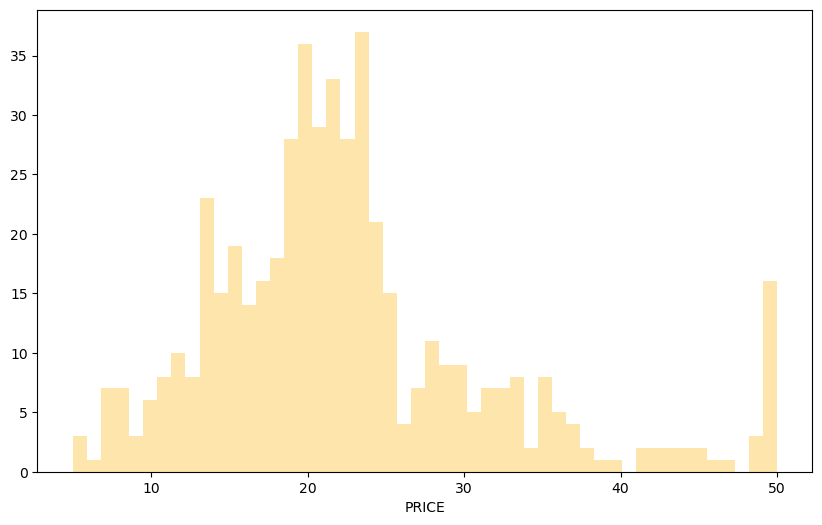

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], bins=50, hist = True, kde = False, color = '#fbc02d')
plt.show()

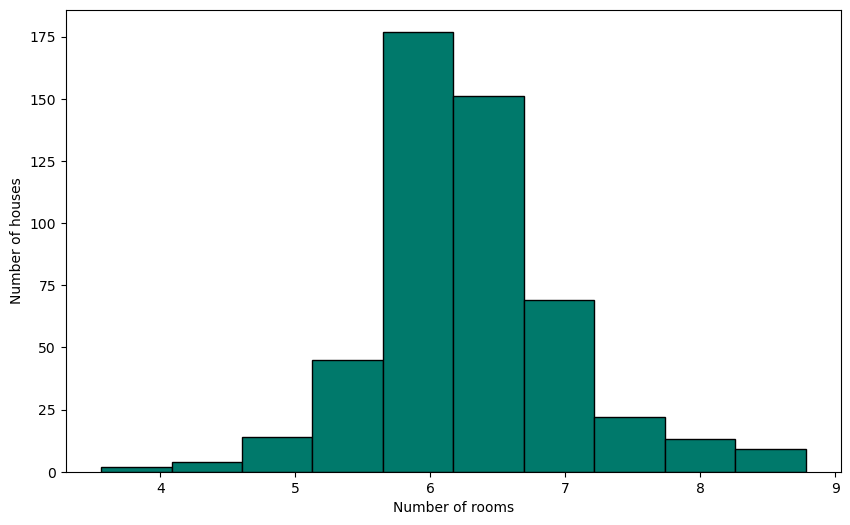

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'], ec = 'black', color = '#00796b')
plt.xlabel('Number of rooms')
plt.ylabel('Number of houses')
plt.show()

In [19]:
data['RM'].mean()

6.284634387351779

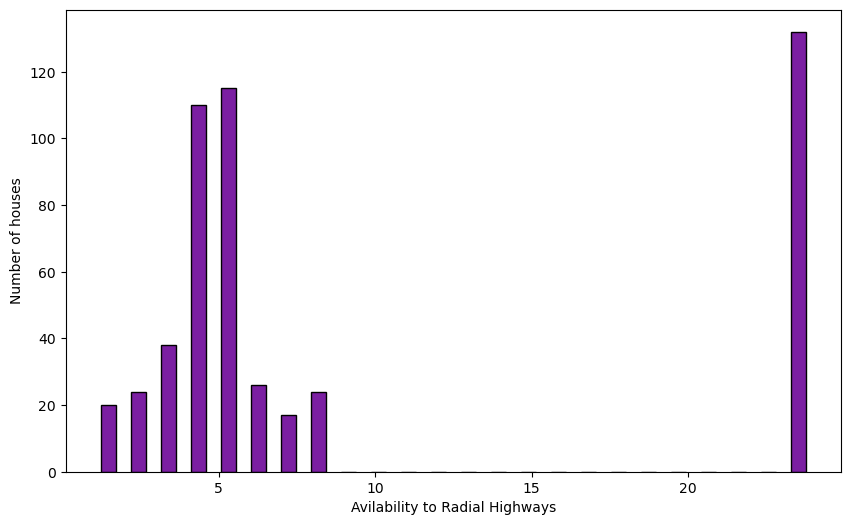

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'], bins=24, ec = 'black', color = '#7b1fa2', rwidth = 0.5)
plt.xlabel('Avilability to Radial Highways')
plt.ylabel('Number of houses')
plt.show()

In [21]:
data['RAD'].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

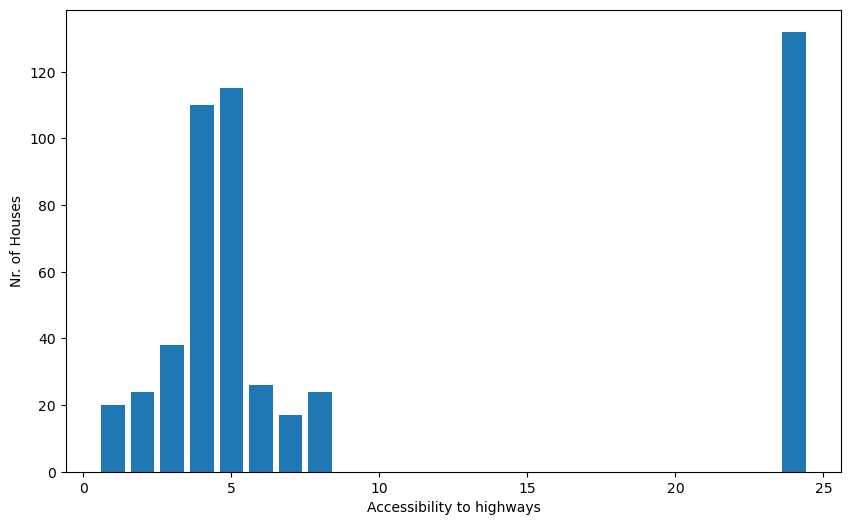

In [22]:
plt.figure(figsize=(10,6))
frequency = data['RAD'].value_counts()
#type(frequency)
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of Houses')
#frequency.axes[0]
plt.bar(frequency.index, height = frequency)
plt.show()

In [23]:
data['CHAS'].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

## Descriptive Statistics

In [24]:
data['PRICE'].min()

5.0

In [25]:
data['PRICE'].max()

50.0

In [26]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [27]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [28]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [29]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [30]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation
## $$ \rho _{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [31]:
data['PRICE'].corr(data['RM'])

0.6953599470715393

In [32]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375616

In [33]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [34]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

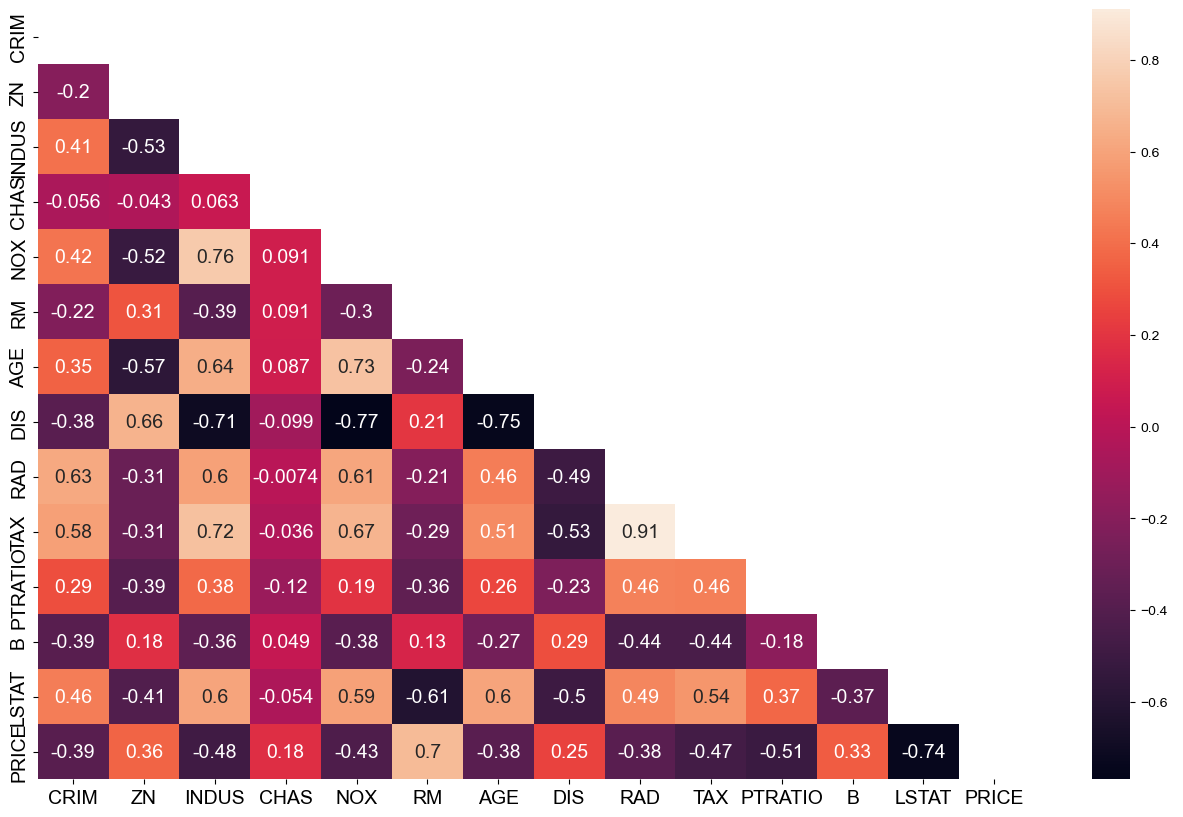

In [35]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(), mask=mask, annot = True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

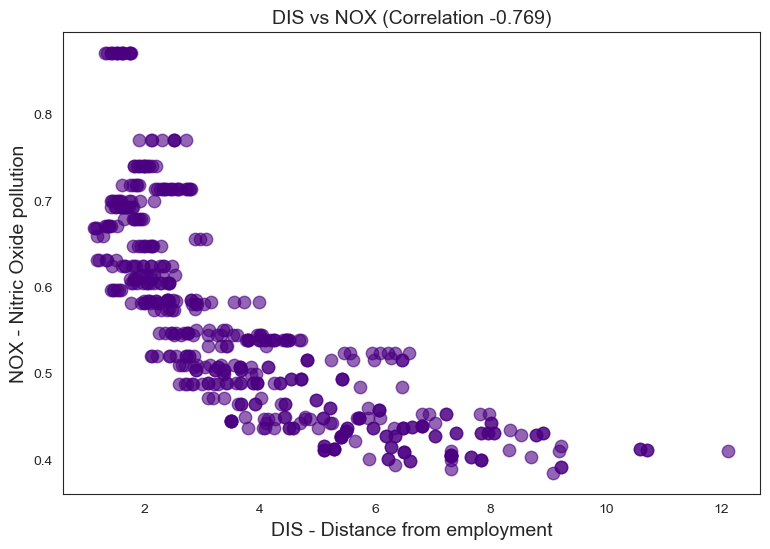

In [36]:
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize = (9,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha = 0.6, s=80, color = 'indigo')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize = 14)
plt.xlabel('DIS - Distance from employment', fontsize = 14)
plt.ylabel('NOX - Nitric Oxide pollution', fontsize = 14)
plt.show()

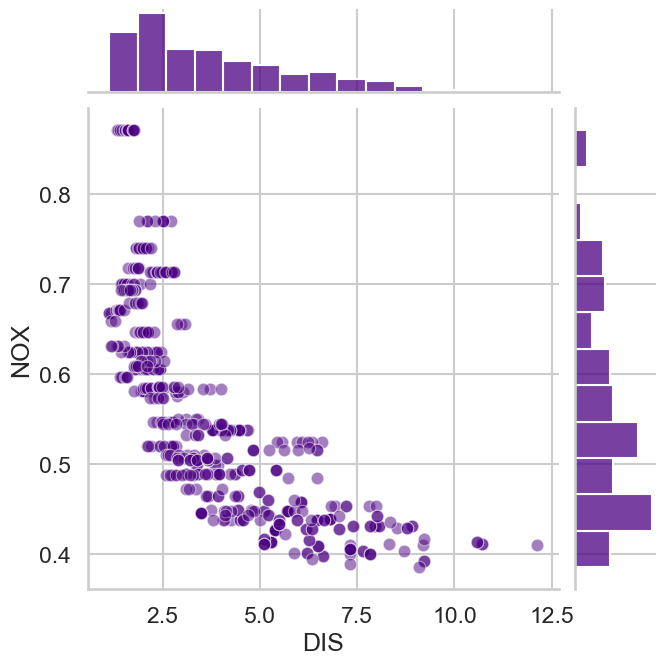

In [37]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x= data['DIS'], y = data['NOX'], height = 7, color = 'indigo', joint_kws = {'alpha': 0.5})
plt.show()

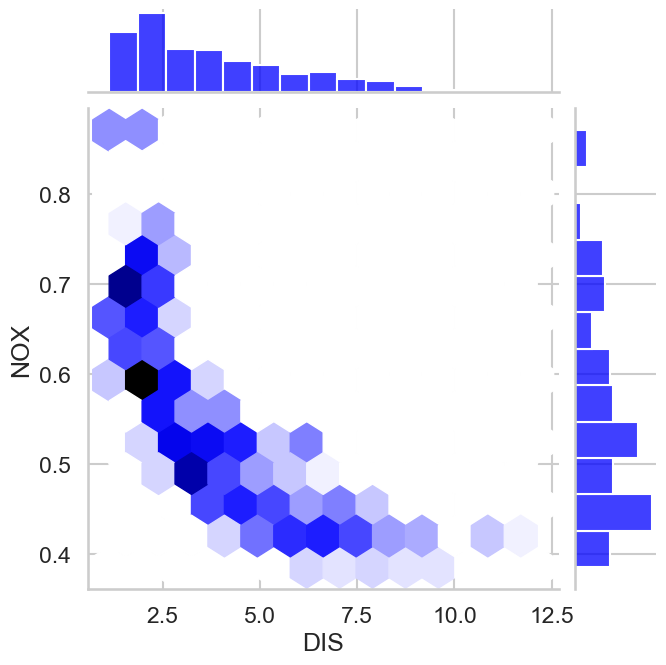

In [38]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x= data['DIS'], y = data['NOX'], kind = 'hex', height = 7, color = 'blue')
plt.show()

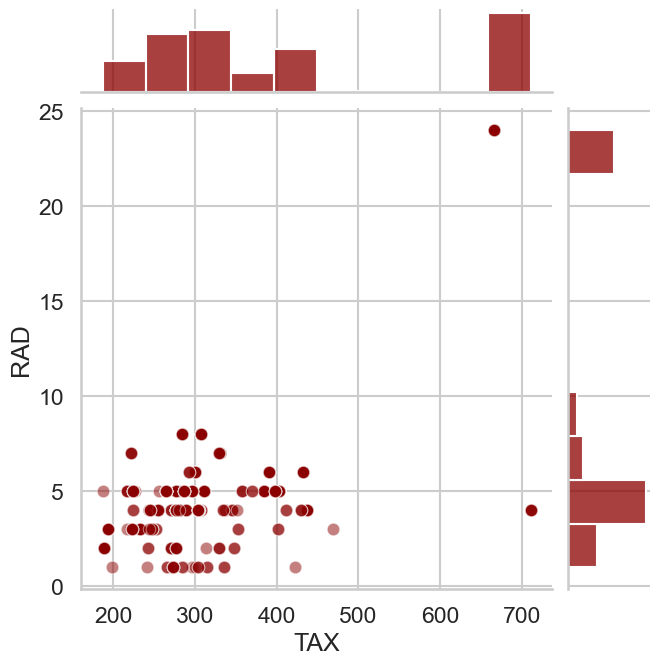

In [39]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x= data['TAX'], y = data['RAD'], height = 7, color = 'darkred', joint_kws = {'alpha': 0.5})
plt.show()

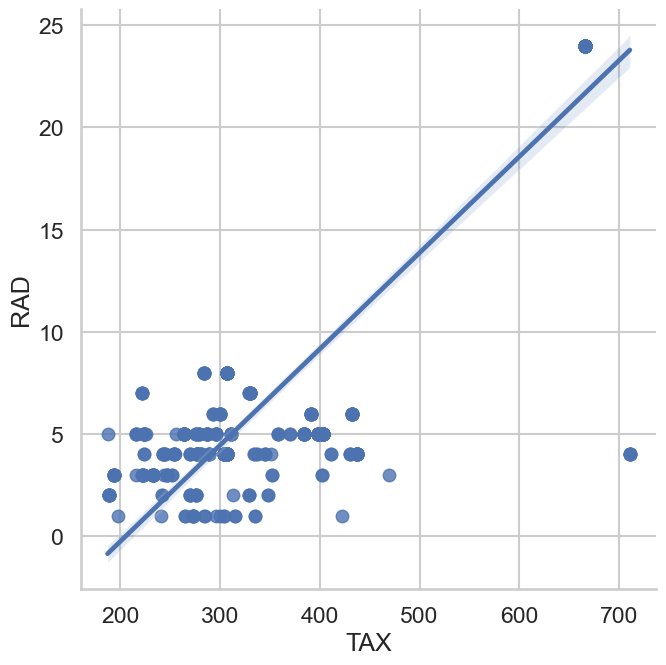

In [41]:
sns.lmplot(x='TAX', y='RAD', data = data, height=7)
plt.show()

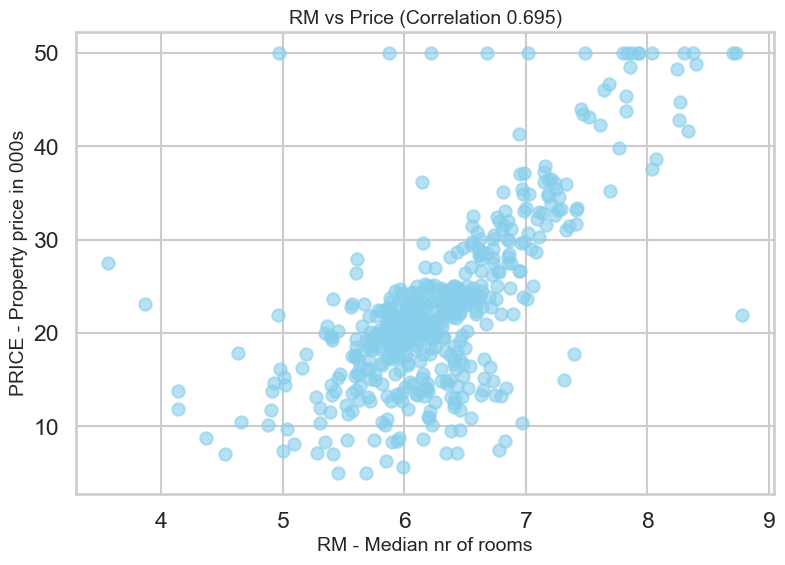

In [42]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']),3)
plt.figure(figsize = (9,6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha = 0.6, s=80, color = 'skyblue')
plt.title(f'RM vs Price (Correlation {rm_tgt_corr})', fontsize = 14)
plt.xlabel('RM - Median nr of rooms', fontsize = 14)
plt.ylabel('PRICE - Property price in 000s', fontsize = 14)
plt.show()

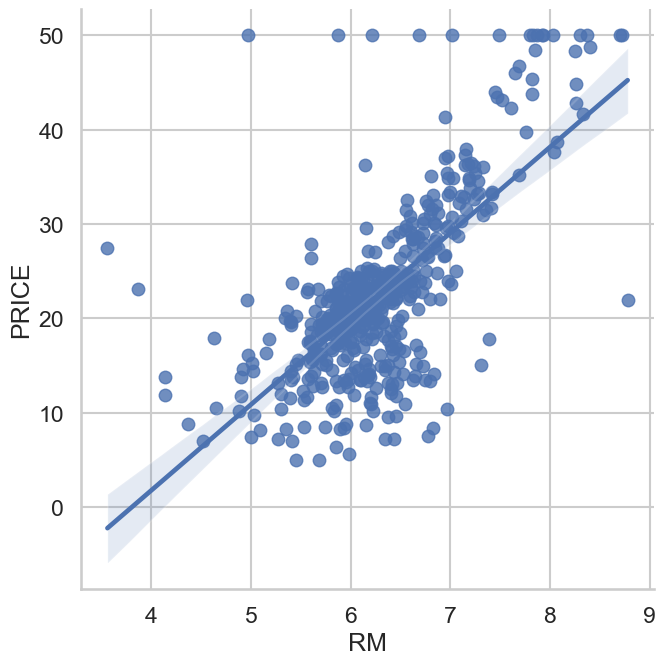

In [43]:
sns.lmplot(x= 'RM', y= 'PRICE', data=data, height=7)
plt.show()

In [ ]:
%%time
sns.pairplot(data)
plt.show()

In [ ]:
%%time

sns.pairplot(data, kind = 'reg', plot_kws={'line_kws': {'color': 'cyan'}})
plt.show()

## Training & Test Data Set

In [ ]:
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

# % of training set
len(X_train)/ len(features)

In [ ]:
# % of test data set
X_test.shape[0]/features.shape[0]

## Multivariable Regression

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)


print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))


print('Intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_, index=X_train.columns, columns = ['coef'])

## Data Transformations

In [ ]:
data['PRICE'].skew()

In [ ]:
y_log = np.log(data['PRICE'])
y_log.head()

In [ ]:
y_log.skew()

In [ ]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

In [ ]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log


sns.lmplot(x='LSTAT', y= 'LOG_PRICE', data=transformed_data, height=7,
          scatter_kws={'alpha': 0.6}, line_kws={'color': 'cyan'})
plt.show()

## Regression Using log prices

In [ ]:
prices = np.log(data['PRICE']) # Use log
features = data.drop('PRICE', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

regr = LinearRegression()
regr.fit(X_train, y_train)


print('Training data r-squared: ', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))


print('Intercept', regr.intercept_)
pd.DataFrame(data= regr.coef_, index=X_train.columns, columns = ['coef'])

In [ ]:
# Charles River Property Premium

np.e**0.080475

## p values & Evaluating Coefficients

In [ ]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()


results.params

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + .... + \alpha _{12} LSTAT $$

$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [ ]:
variance_inflation_factor(exog = X_incl_const.values, exog_idx = 1)

In [ ]:

len(X_incl_const.columns)
X_incl_const.shape

In [ ]:
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog = X_incl_const.values, exog_idx = i))
print('All done')

In [ ]:
vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog = X_incl_const.values, exog_idx = i))
print(vif)

In [ ]:
vif = [variance_inflation_factor(exog = X_incl_const.values, exog_idx = i) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif': np.around(vif, 2)})

## Model simplification and BIC (Baysian Information Criterion (BIC))

In [ ]:
# Original model with log prices and all faetures 

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is ", results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model excluding INDUS


X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis = 1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is ", results.bic)
print('r-squared is', results.rsquared)

In [ ]:
# Reduced model excluding INDUS and Age


X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis = 1)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print("BIC is ", results.bic)
print('r-squared is', results.rsquared)

In [ ]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis = 1)

## Residuals & Residual Plots

In [ ]:
# Modified model: transformed (using log prices) and dropping two features

prices = np.log(data['PRICE']) # Use log
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

# Using statsmodel



X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

#Residuals
#residuals = y_train - results.fittedvalues
#residuals.describe()

#results.resid

# Graph of Actual vs. Predicted Prices 
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x= y_train, y= results.fittedvalues, c = 'navy', alpha = 0.6)
plt.plot(y_train, y_train, c = 'cyan')
plt.xlabel('Actual log prices $y_i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize = 17)
plt.show()



plt.scatter(x= np.e**y_train, y= np.e**results.fittedvalues, c = 'blue', alpha = 0.6)
plt.plot(np.e**y_train, np.e**y_train, c = 'cyan')
plt.xlabel('Actual log prices $y_i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize = 17)
plt.show()



# Residuals vs Predicted values


plt.scatter(x= results.fittedvalues, y= results.resid, c = 'blue', alpha = 0.6)

plt.xlabel('Predicted log prices $\hat y_i$', fontsize = 14)
plt.ylabel('Residuals $\hat y _i$', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 17)
plt.show()


# Mean Squared Error & R-Squarred
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared, 3)

In [ ]:
# Distribution of Residuals (log prices) - checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'navy')
plt.title(f'log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [ ]:
# Original model: normal prices & all features

prices = data['PRICE']
features = data.drop(['PRICE'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

# Using statsmodel



X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


# Graph of Actual vs. Predicted Prices 
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x= y_train, y= results.fittedvalues, c = 'indigo', alpha = 0.6)
plt.plot(y_train, y_train, c = 'cyan')
plt.xlabel('Actual prices  000s $y_i$', fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted prices: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize = 17)
plt.show()


# Residuals vs Predicted values


plt.scatter(x= results.fittedvalues, y= results.resid, c = 'indigo', alpha = 0.6)

plt.xlabel('Predicted prices $\hat y_i$', fontsize = 14)
plt.ylabel('Residuals $\hat y _i$', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 17)
plt.show()


# Residual Distribution chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color = 'indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


# Mean Squared Error & R-Squarred
full_normal_mse = round(results.mse_resid,3)
full_normal_rsquared = round(results.rsquared, 3)

In [ ]:
# Model omitting key features using log prices

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size = 0.2, random_state = 10)

# Using statsmodel



X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()


# Graph of Actual vs. Predicted Prices 
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x= y_train, y= results.fittedvalues, c = '#e74c3c', alpha = 0.6)
plt.plot(y_train, y_train, c = 'cyan')
plt.xlabel('Actual log prices  $y_i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr{corr})', fontsize = 17)
plt.show()


# Residuals vs Predicted values


plt.scatter(x= results.fittedvalues, y= results.resid, c = '#e74c3c', alpha = 0.6)

plt.xlabel('Predicted prices $\hat y_i$', fontsize = 14)
plt.ylabel('Residuals $\hat y _i$', fontsize = 14)
plt.title('Residuals vs Fitted Values', fontsize = 17)
plt.show()



# Mean Squared Error & R-Squarred
omitted_var_mse = round(results.mse_resid,3)
omitted_var_rsquared = round(results.rsquared, 3)

In [71]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared, omitted_var_rsquared],
               'MSE':  [reduced_log_mse, full_normal_mse, omitted_var_mse],
            'RMSE': np.sqrt([reduced_log_mse, full_normal_mse, omitted_var_mse])},
                index= ['Reduced Log Model', 'Full Normal Price Model', 'Omitted Var Model'])

,R-Squared,MSE,RMSE
Reduced Log Model,0.792,0.035,0.187083
Full Normal Price Model,0.750,19.921,4.463295
Omitted Var Model,0.460,0.090,0.300000


In [77]:
print('1 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is:', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)

1 s.d. in log prices is 0.37416573867739417
2 s.d. in log prices is: 0.37416573867739417
The upper bound for a 95% prediction interval is  3.7753631203395495
